# Importing the Dataset

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')    

In [63]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Checking Null Values

In [64]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see null values in the column gender,married,dependents,self employed,loan amount,loan amount term,credit history.
we will replace them.

In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# DataFrame Description

Our dataset has 14 rows and 13 column.The dataset consists of information like Loan_ID,Gender,Married,Dependents,Education,   Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status.

We are going to predict the outcome as wheather the loan status will be yes or no according to the given data.Who all will be getting loan depending on thier credit history and their employment type,wheather they have property for replacing the loan amount and background of their history details in the account mentioned.

# Exploratory Data Analysis

# Checking the datatypes of the columns


In [66]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [68]:
df.shape

(614, 13)

# Statistical Analysis

In [132]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,4.857444,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.495995,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,4.857444,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204


we can see the mean of the loam amount is greater the median.And in credit history mean is less than the median.


Lets see how the credit history affects the loan status of each of the applicant.

In [70]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


we can see the applicants of credit history are more eligible for the loan than ones who doesnt have any records in past.

# Data Visualization

<AxesSubplot:>

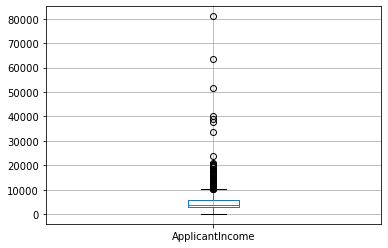

In [71]:
df.boxplot(column='ApplicantIncome')

so we can see more outliers for this variable,we will handle this.

for better understanding we are plotting histogram for the same variable.

<AxesSubplot:>

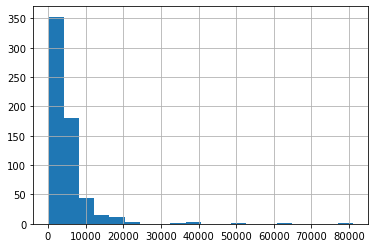

In [72]:
df['ApplicantIncome'].hist(bins=20)

we can see skewness in this and its right skewed plot.

<AxesSubplot:>

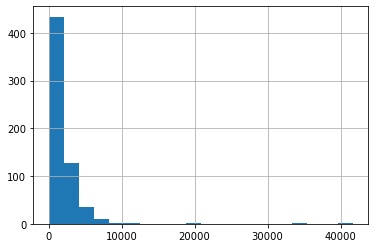

In [73]:
df['CoapplicantIncome'].hist(bins=20)

this is also right skewed plot

# Bivariate Analysis

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

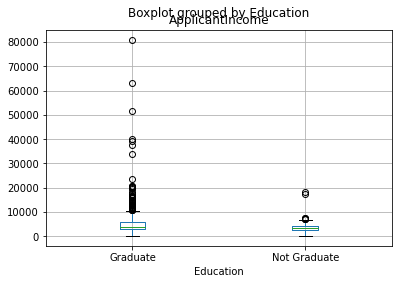

In [74]:
df.boxplot(column='ApplicantIncome',by='Education')

we can infer that the salary  varies too much for graduate and the one who not graduated.

<AxesSubplot:>

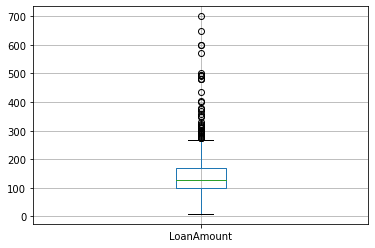

In [75]:
df.boxplot(column='LoanAmount')

we can infer more outliers here.

<AxesSubplot:>

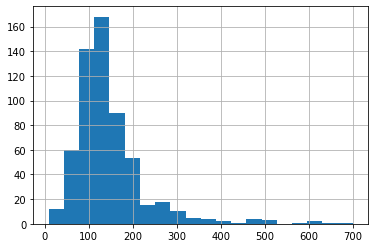

In [76]:
df['LoanAmount'].hist(bins=20)

even loan amount is right also right skewed.lets handle it here.

# Data Preprocessing

<AxesSubplot:>

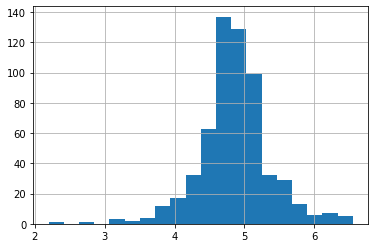

In [77]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

we can see the data is normalised now.

# Missing Values

In [78]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

we can see many missing values.lets handle this by filling these missing values.

In [79]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)


In [80]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [81]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [82]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [83]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [84]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [85]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [86]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

Now we have replaced all the missing values by mean and mode.

we are now going to work with the right skewed plots.

In [87]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])

<AxesSubplot:>

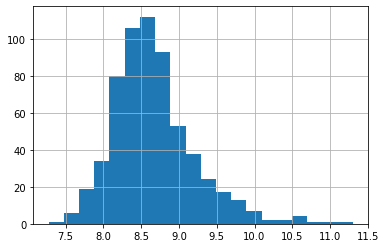

In [88]:
df['TotalIncome_log'].hist(bins=20)

Now we can see a normalised histogram.So the values of TotalIncome is removed from skewness.

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


Now we have handled the missing values and removed skewness also,since we merged the columns to find the total income ,we can find the in the df new columns added like totalincome_log and Loanamount_log.

Now we are going to separate the independent variable and dependent variables.

# Train Test Split

In [179]:
x =df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

In [180]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [181]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

now we can see all the independent variables in the x and all the dependent variables in y.

In [182]:
x.shape,y.shape

((614, 8), (614,))

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [184]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [186]:
x_train.shape,x_test.shape

((491, 8), (123, 8))

we can see some categorical values.we will be using label encoder to convert this to numerical vlaues.

In [187]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

In [188]:
for i in range(0,5):
    x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])

In [189]:
x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

In [190]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

we can see all categorical values converted into numerical values.

In [191]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [192]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

now we are going to convert the test part into numerical values using label encoder.

In [193]:
for i in range(0,5):
    x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])

In [194]:
x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])

In [195]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [196]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [197]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# Standard Scaler

In [198]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# Decision Tree Classifier

In [199]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [200]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6991869918699187
[[21 12]
 [25 65]]
              precision    recall  f1-score   support

           0       0.46      0.64      0.53        33
           1       0.84      0.72      0.78        90

    accuracy                           0.70       123
   macro avg       0.65      0.68      0.66       123
weighted avg       0.74      0.70      0.71       123



# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

In [110]:
model=LogisticRegression()
model.fit(x_train,y_train)

lr_prediction=model.predict(x_test)
print('Logistic Regression accuracy =',metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy = 0.8292682926829268


In [111]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
y_test [1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1]


We get 82% accuarcy in Logistic Regression.

we will be seeing few more alogorithms.

# GaussianNB

In [113]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



# We can GaussianNB prediction is performing 83% accuracy on our model.

# kneighbors Classifier

In [201]:
x_train.shape

(491, 8)

In [202]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7967479674796748
[[15 18]
 [ 7 83]]
              precision    recall  f1-score   support

           0       0.68      0.45      0.55        33
           1       0.82      0.92      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.78      0.80      0.78       123



# Ensemble Techniques-Random Forest Classifier¶

# Hyper Parameter Tuning

In [115]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [116]:
forest.score(x_train,y_train)

0.9816700610997964

# Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,forest.predict(x_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('Model Testing Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[14 19]
 [ 3 87]]
Model Testing Accuracy=0.8211382113821138


<AxesSubplot:>

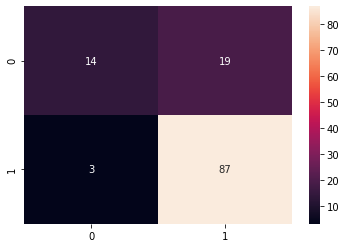

In [130]:
sns.heatmap(cm,annot=True)

In the left side we have actual values and in the bottom side we have predicted values.
The left diagonal has predicted value.

# Model is 82%  on Test data.So our guessing 82% of the Applicants will be eligibile for the loan.

In [119]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [120]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [121]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [122]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
predm=DecisionTreeClassifier()
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predem=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predem))
    print(confusion_matrix(y_test,predem))
    print(classification_report(y_test,predem))
    print('\n')

Accuracy score of DecisionTreeClassifier() is
0.7154471544715447
[[20 13]
 [22 68]]
              precision    recall  f1-score   support

           0       0.48      0.61      0.53        33
           1       0.84      0.76      0.80        90

    accuracy                           0.72       123
   macro avg       0.66      0.68      0.66       123
weighted avg       0.74      0.72      0.73       123



Accuracy score of SVC() is
0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



Accuracy score of KNeighborsClassifier() is
0.7967479674796748
[[15 18]
 [ 7 83]]
              precision    recall  f1-score   support

           0       0.68      0.45      0.55        33
  

# Cross Validation

In [203]:
import numpy as np
from sklearn.model_selection import KFold
x = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(x)
print(kf)



KFold(n_splits=2, random_state=None, shuffle=False)


In [204]:
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_1, x_test_1 = x[train_index], x[test_index]
    y_train_1, y_test_1 = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


# Saving the best model


# Conclusion:¶

The Loan Status is heavily dependent on the Credit History for predictions.
The Logistic Regression algorithm gives us the maximum Accuracy (82% approx) .

In [205]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)



In [206]:
with open('model_pickle','rb') as f:
    lr_prediction=pickle.load(f)

In [207]:
lr_prediction


[DecisionTreeClassifier(),
 SVC(),
 KNeighborsClassifier(),
 GaussianNB(),
 RandomForestClassifier()]

# AUC ROC CURVE

In [208]:
from  sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [209]:
x_test.shape

(123, 8)

In [210]:
knn

KNeighborsClassifier()

In [211]:
knn.predict(x_test)

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [212]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [213]:
y_pred_prob

array([0.6, 1. , 0.2, 1. , 1. , 0. , 0.8, 0.4, 0.2, 1. , 1. , 1. , 0.8,
       1. , 0.8, 0.8, 0.8, 0.6, 1. , 0. , 0. , 1. , 1. , 1. , 0.8, 0.8,
       0.8, 1. , 0.2, 0. , 0.4, 0.4, 1. , 0.8, 0.8, 0. , 0.8, 0.8, 1. ,
       0.8, 1. , 0.2, 1. , 1. , 0.8, 0.6, 0.8, 1. , 0.8, 0.6, 1. , 1. ,
       1. , 1. , 1. , 0.6, 1. , 0.8, 1. , 0.8, 0. , 0.8, 1. , 0. , 1. ,
       0.6, 0.8, 1. , 0.8, 0.8, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 1. ,
       1. , 0. , 1. , 0.6, 0.8, 0.8, 0.8, 1. , 1. , 0.8, 0.8, 0.6, 0.8,
       0.8, 1. , 0.2, 0.8, 0. , 1. , 1. , 1. , 0.6, 0.8, 1. , 0.8, 0.8,
       0.6, 0.8, 0.8, 1. , 0.8, 0.8, 0.8, 1. , 0.4, 0.8, 0. , 0. , 1. ,
       0.6, 0.8, 0.8, 0.4, 0. , 0.8])

In [214]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [215]:
fpr

array([0.        , 0.15151515, 0.51515152, 0.54545455, 0.57575758,
       0.6969697 , 1.        ])

In [216]:
tpr

array([0.        , 0.4       , 0.77777778, 0.92222222, 0.96666667,
       0.97777778, 1.        ])

In [217]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

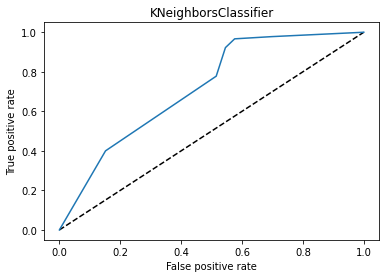

In [218]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [219]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))

In [220]:
print(auc_score)

0.6883838383838384


Usually, the AUC is in the range [0.5,1] because useful classifiers should perform better than random. In principle, however, the AUC can also be smaller than 0.5, 